# SuperAI Season 4 - Level Individual Hackathon - Sleep Stages Classification <br> Data Preparation

## Explore Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from tqdm.notebook import tqdm

In [2]:
sample_train_df = pd.read_csv('./datasets/train/train002.csv')
sample_test_df = pd.read_csv('./datasets/test/test001/test001_00000.csv')

In [3]:
sample_train_df

,BVP,ACC_X,ACC_Y,ACC_Z,TEMP,EDA,HR,IBI,Sleep_Stage
0,-51.36,6.0,62.0,-18.0,29.43,0.081995,68.53,0.656250,W
1,-5.81,6.0,62.0,-18.0,29.43,0.081995,68.53,0.656250,W
2,48.05,5.0,61.0,-18.0,29.43,0.081995,68.53,0.656250,W
3,98.32,5.0,61.0,-18.0,29.43,0.081995,68.53,0.656250,W
4,136.89,3.0,62.0,-17.0,29.43,0.081995,68.53,0.656250,W
...,...,...,...,...,...,...,...,...,...
1591675,27.76,-38.0,-2.0,54.0,32.16,0.333106,61.33,1.140625,W
1591676,25.00,-38.0,-2.0,54.0,32.16,0.333106,61.33,1.140625,W
1591677,22.50,-38.0,-2.0,54.0,32.16,0.333106,61.33,1.140625,W
1591678,19.76,-37.0,-2.0,54.0,32.16,0.333106,61.33,1.140625,W


In [4]:
sample_test_df

,BVP,ACC_X,ACC_Y,ACC_Z,TEMP,EDA,HR,IBI
0,-151.73,-5.0,-40.0,47.0,35.00,0.430716,63.67,0.84375
1,-168.95,-5.0,-40.0,47.0,35.00,0.430716,63.67,0.84375
2,-187.49,-5.0,-40.0,48.0,35.00,0.430716,63.67,0.84375
3,-203.74,-5.0,-40.0,48.0,35.00,0.430716,63.67,0.84375
4,-212.81,-4.0,-40.0,47.0,35.00,0.430716,63.67,0.81250
...,...,...,...,...,...,...,...,...
1915,53.48,-5.0,-40.0,48.0,35.03,0.433279,66.17,0.90625
1916,83.64,-5.0,-40.0,47.0,35.03,0.433279,66.17,0.90625
1917,109.06,-5.0,-40.0,47.0,35.03,0.433279,66.17,0.90625
1918,131.10,-5.0,-40.0,47.0,35.03,0.433279,66.17,0.90625


In [5]:
sample_train_df.loc[0]

BVP              -51.36
ACC_X               6.0
ACC_Y              62.0
ACC_Z             -18.0
TEMP              29.43
EDA            0.081995
HR                68.53
IBI             0.65625
Sleep_Stage           W
Name: 0, dtype: object

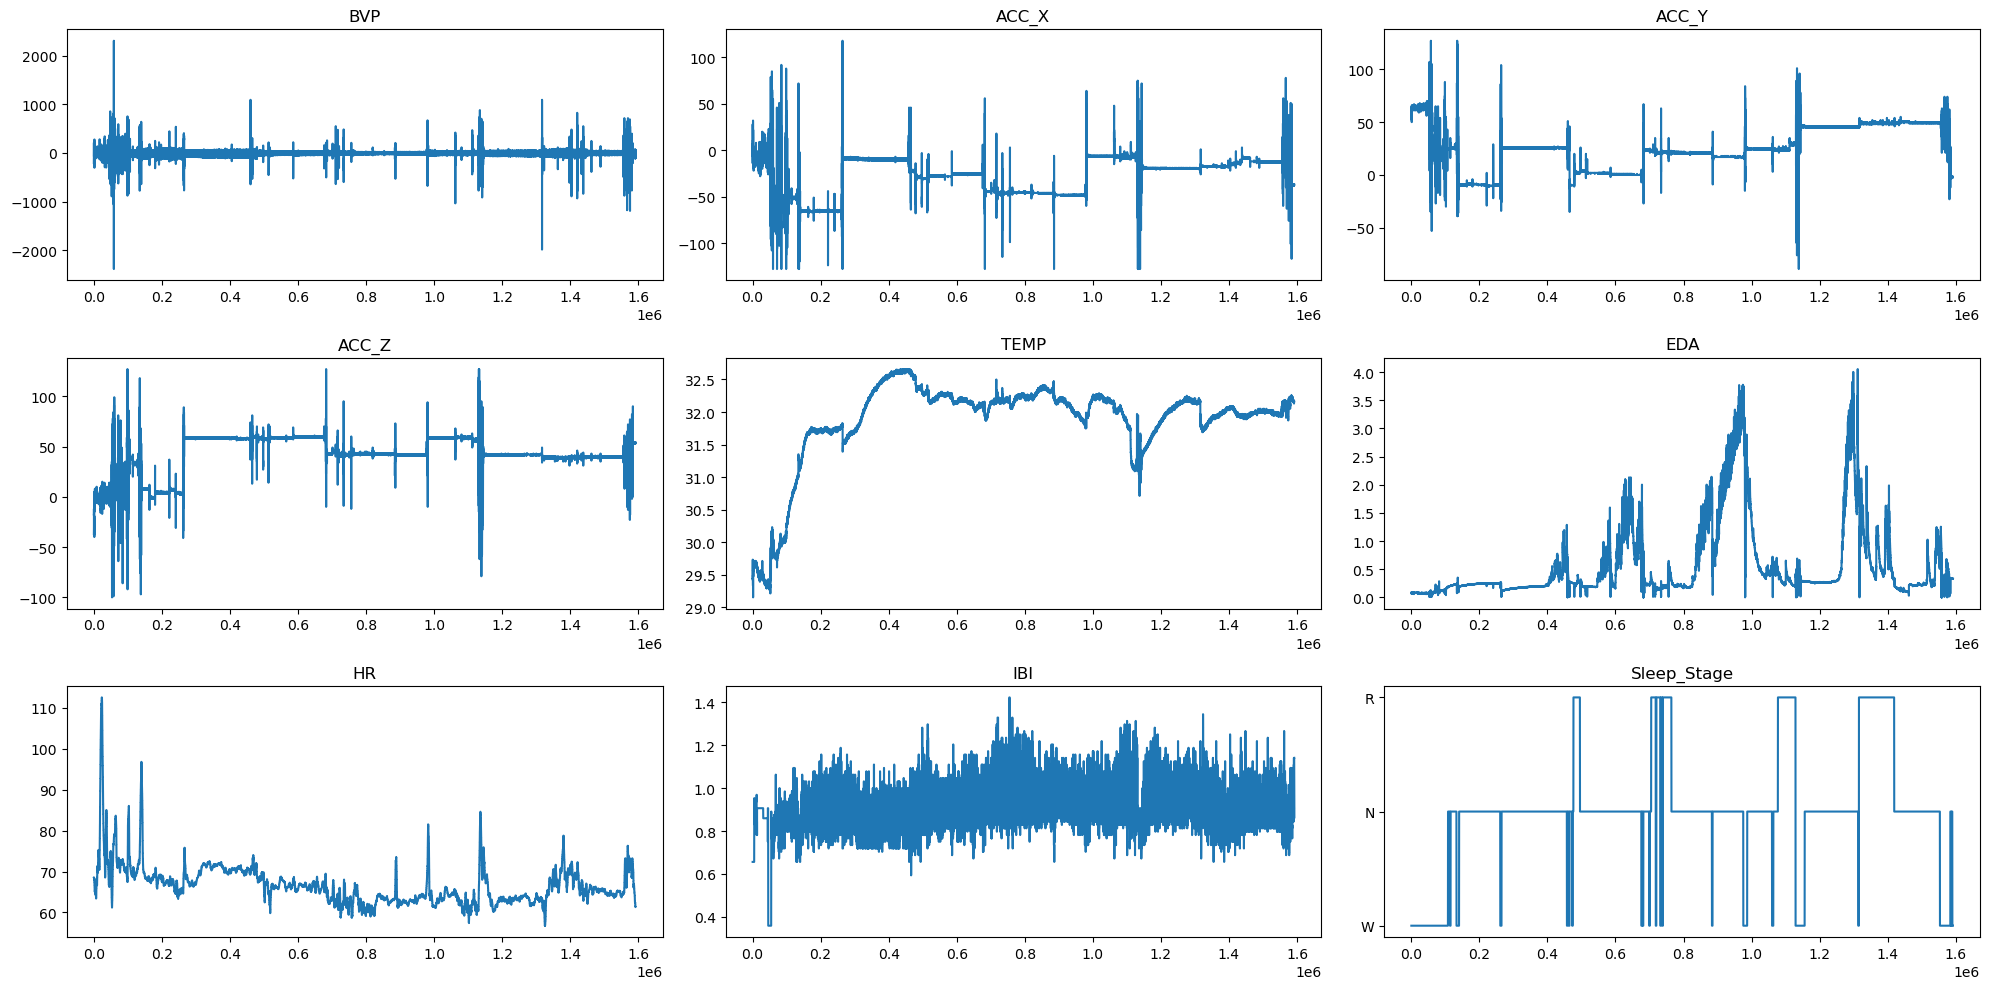

In [6]:
fig, axes = plt.subplots(3 , 3 ,  figsize=(20, 10))

for idx in range(9) :

    column = sample_train_df.columns[idx]

    axes[idx // 3 , idx % 3].plot(sample_train_df[column])
    axes[idx // 3 , idx % 3].set_title(column)

plt.tight_layout()
plt.show()

In [7]:
sample_train_df['Sleep_Stage'].value_counts()

Sleep_Stage
N    1144320
R     228480
W     218880
Name: count, dtype: int64

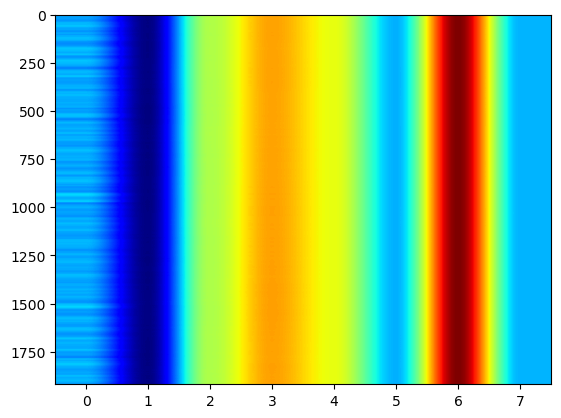

In [8]:
background = sample_train_df
background_arrays = background.iloc[: , : 8].to_numpy()
background_arrays = np.reshape (background_arrays ,  newshape = (int(background_arrays.shape[0] / 1920) , 1920 , 8) )
plt.imshow(background_arrays.mean(axis = 0) , cmap = 'jet' , aspect = 'auto' )

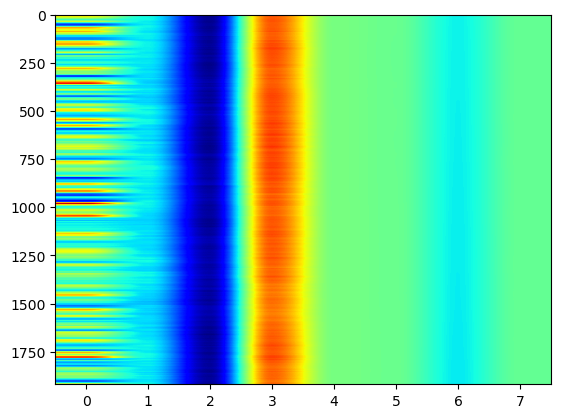

In [9]:
N_class = sample_train_df[ sample_train_df['Sleep_Stage'] == 'N']
N_arrays = N_class.iloc[: , : 8].to_numpy()
N_arrays = np.reshape (N_arrays ,  newshape = (int(N_arrays.shape[0] / 1920) , 1920 , 8) )
plt.imshow(N_arrays.mean(axis = 0) - background_arrays.mean(axis = 0) , cmap = 'jet' , aspect = 'auto' )

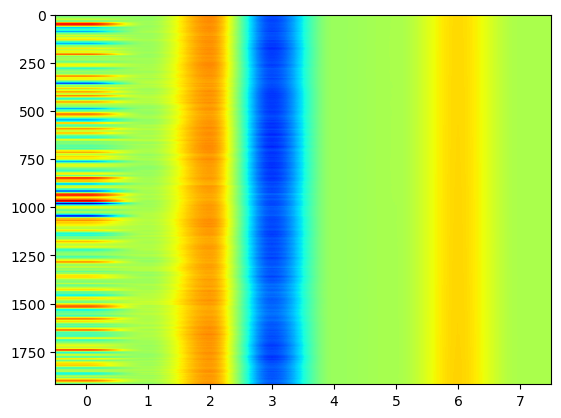

In [10]:
W_class = sample_train_df[ sample_train_df['Sleep_Stage'] == 'W']
W_arrays = W_class.iloc[: , : 8].to_numpy()
W_arrays = np.reshape (W_arrays ,  newshape = (int(W_arrays.shape[0] / 1920) , 1920 , 8) )
plt.imshow(W_arrays.mean(axis = 0) - background_arrays.mean(axis = 0) , cmap = 'jet' , aspect = 'auto' )

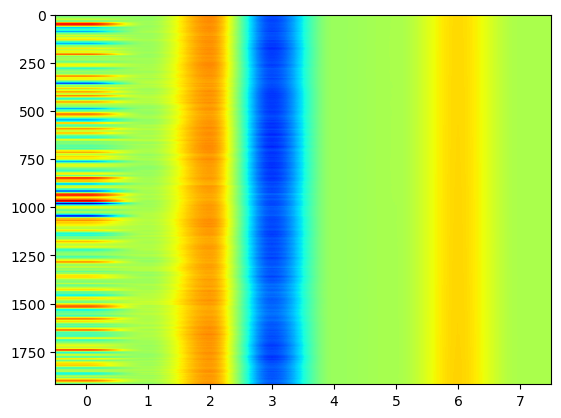

In [11]:
R_class = sample_train_df[ sample_train_df['Sleep_Stage'] == 'R']
R_arrays = R_class.iloc[: , : 8].to_numpy()
R_arrays = np.reshape (R_arrays ,  newshape = (int(R_arrays.shape[0] / 1920) , 1920 , 8) )
plt.imshow(W_arrays.mean(axis = 0) - background_arrays.mean(axis = 0) , cmap = 'jet' , aspect = 'auto' )

## Convert Dataframe into numpy

In [12]:
id2label = {
    0 : 'W' ,
    1 : 'N' ,
    2 : 'R'
}
label2id = {
    'W' : 0 ,
    'N' : 1 ,
    'R' : 2
}

In [13]:
all_train_df = []

for file in tqdm(glob.glob('./datasets/train/*.csv')) :

    df = pd.read_csv(file)
    
    second = np.array(list(range(len(df)))) * 0.015625
    df['second'] = second
    
    all_train_df.append(df)

all_train_df = pd.concat(all_train_df)

  0%|          | 0/83 [00:00<?, ?it/s]

In [14]:
train_arrays = all_train_df.drop(columns = ['Sleep_Stage'])
train_arrays = train_arrays.to_numpy()
label_arrays = np.array( [ label2id[all_train_df.iloc[idx]['Sleep_Stage']] for idx in tqdm(range(0 , len(all_train_df) , 1920))])

  0%|          | 0/66607 [00:00<?, ?it/s]

In [15]:
print(train_arrays.shape , label_arrays.shape)

(127885440, 9) (66607,)


In [16]:
train_arrays = np.reshape( train_arrays , newshape = (66607 , 1920 , 9) )

In [17]:
train_arrays = train_arrays.mean(axis = 1)

In [18]:
train_arrays.shape

(66607, 9)

In [19]:
second = train_arrays[: , 8]
minute = (second % 3600) // 60
hour = second // 3600
second = second % 60

In [25]:
train_arrays[: , 8] = second

In [30]:
print(train_arrays.shape , minute.shape , hour.shape)

(66607, 9) (66607,) (66607,)


In [31]:
minute = np.reshape(minute , newshape=(66607 , 1))
hour = np.reshape(hour , newshape=(66607 , 1))

In [33]:
train_arrays = np.hstack( (train_arrays , minute , hour))

In [35]:
print(train_arrays.shape , label_arrays.shape)

(66607, 11) (66607,)


In [36]:
with open ('./database/arrays.npy' , 'wb') as file :

    np.save(file , train_arrays.astype(np.float32))

with open ('./database/labels.npy' , 'wb') as file :

    np.save(file , label_arrays.astype(np.float32))

In [38]:
arrays = []

for folder in tqdm(sorted(glob.glob('./datasets/test/*'))) :

    for file in sorted(glob.glob(f'{folder}/*.csv')) :

        df = pd.read_csv(file)
        
        second = np.array(list(range(len(df)))) * 0.015625
        df['second'] = second
    
        array = df.to_numpy()
        arrays.append(array)


  0%|          | 0/10 [00:00<?, ?it/s]

In [39]:
arrays = np.array(arrays)
arrays = np.reshape(arrays , newshape = (7970 , 1920 , 9))

In [40]:
arrays = arrays.mean(axis = 1)

In [41]:
arrays.shape

(7970, 9)

In [42]:
second = arrays[: , 8]
minute = (second % 3600) // 60
hour = second // 3600
second = second % 60

In [43]:
arrays[: , 8] = second

In [46]:
minute = np.reshape(minute , newshape=(7970 , 1))
hour = np.reshape(hour , newshape=(7970 , 1))

In [47]:
arrays = np.hstack( (arrays , minute , hour))

In [48]:
print(arrays.shape)

(7970, 11)


In [49]:
with open ('./database/test.npy' , 'wb') as file :

    np.save(file , arrays.astype(np.float32))